In [5]:
import numpy as np

In [118]:
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2


def grad(x, y):
    return np.array([2 * (x - 1) + 400 * x * (x**2 - y), 200 * (y - x**2)])


def hesse(x, y):
    return np.array([[2-400*(y-3*x**2), -400*x], [-400*x, 200]])


def linesearch(x, d):
    pass

In [124]:
# scipy の optimize 関数を利用
from scipy import optimize
# なぜか warning が出るので無視する
import warnings
# warnings.filterwarnings('ignore', 'The iteration is not making good progress')

# x0 = optimize.fsolve(rosenbrock, x0=np.array([2,2]), xtol=1e-06, maxfev=100)
# print(x0)

In [162]:
# Newton method
init = np.array([-2, -2])
eps = 0.1**10
x = init
seq  =[x]
for i in range(100):
    H = hesse(*x)
    g = grad(*x)
    d = - np.dot(np.linalg.inv(H), g)
    if np.linalg.norm(d) < eps: break
    x = x + d
    seq.append(x)
print(seq)

[array([-2, -2]), array([-1.99750208,  3.99000833]), array([ 0.99626402, -7.97009348]), array([ 0.9962661 ,  0.99254615]), array([ 1.        ,  0.99998606]), array([ 1.,  1.])]


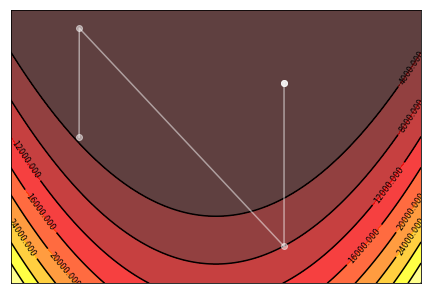

In [187]:
import numpy as np
import matplotlib.pyplot as plt

f = rosenbrock

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-10, 5, n)
X,Y = np.meshgrid(x, y)

# 描画範囲の設定
plt.axes([0.025, 0.025, 0.95, 0.95])
# 等高線の隙間の色設定
plt.contourf(X, Y, f(X, Y), 10, alpha=.75, cmap=plt.cm.hot)
# 等高線の色設定
C = plt.contour(X, Y, f(X, Y), 10, colors='black', linewidth=.5)
# 等高線の値表示
plt.clabel(C, inline=1, fontsize=8)

plt.plot(data_x, data_y, 'o-', color='w', alpha=0.5)

plt.xticks(())
plt.yticks(())
plt.show()

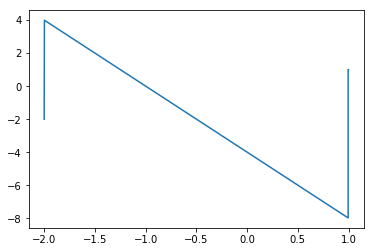

In [164]:
data_x = [x[0] for x in seq]
data_y = [x[1] for x in seq]
plt.plot(data_x, data_y)
plt.show()

In [133]:
 from scipy.optimize import minimize, rosen, rosen_der

x0 = [1.3, 0.7, 0.8, 1.9, 1.2]
res = minimize(rosen, x0, method='Nelder-Mead', tol=1e-6)
print(res.x)
res = minimize(rosen, x0, method='BFGS', jac=rosen_der, options={'gtol': 1e-6, 'disp': True})
print(res.x)
print(res.message)
print(res.hess_inv)

[ 1.00000002  1.00000002  1.00000007  1.00000015  1.00000028]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 31
         Gradient evaluations: 31
[ 1.  1.  1.  1.  1.]
Optimization terminated successfully.
[[ 0.00763624  0.0125159   0.02359808  0.0465684   0.09317974]
 [ 0.0125159   0.02489687  0.04727754  0.09353774  0.18708048]
 [ 0.02359808  0.04727754  0.09483095  0.18783847  0.37561493]
 [ 0.0465684   0.09353774  0.18783847  0.37715312  0.75414172]
 [ 0.09317974  0.18708048  0.37561493  0.75414172  1.51296479]]


In [136]:
rosen([2,2])

401.0